# 프로젝트: 퍼스널 컬러 진단 - CNN

## 데이터
1. 직접 수집한 쿨톤 100장, 웜톤 100장  

## 목표
1. ColorAutoEncoder을 이용한 쿨톤과 웜톤 분류
2. 간단한 CNN 분류

# 1. ColorAutoEncoder을 이용한 쿨톤과 웜톤 분류 (망함. 지울예정)


## (1) ColorAutoEncoder을 이용한 mnist 숫자 특징 잡기
- 원본데이터의 특징을 추출한 것을 바탕으로 다시 데이터 복원하는 코드임

100%|██████████| 9912422/9912422 [00:00<00:00, 70376056.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31529332.07it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21533898.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7506118.51it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.0330
Epoch [2/10], Loss: 0.0212
Epoch [3/10], Loss: 0.0171
Epoch [4/10], Loss: 0.0144
Epoch [5/10], Loss: 0.0135
Epoch [6/10], Loss: 0.0136
Epoch [7/10], Loss: 0.0126
Epoch [8/10], Loss: 0.0127
Epoch [9/10], Loss: 0.0127
Epoch [10/10], Loss: 0.0087


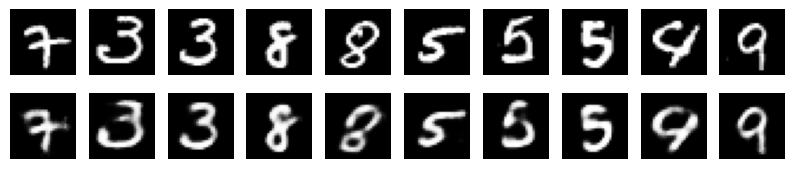

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 데이터셋 로드 (예시로 MNIST 데이터셋 사용)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # 이미지는 0과 1 사이의 값으로 정규화되어 있으므로 Sigmoid 사용
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 모델과 손실 함수, 최적화 함수 정의
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
epochs = 10
for epoch in range(epochs):
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)  # 28x28 이미지를 784차원으로 펼치기
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 변형된 이미지 생성 및 시각화
with torch.no_grad():
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        outputs = model(images)
        break  # 첫 번째 배치의 이미지만 사용

    # 원본 이미지
    original_images = images.view(-1, 28, 28)
    # 변형된 이미지
    transformed_images = outputs.view(-1, 28, 28)

    # 시각화
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(transformed_images[i], cmap='gray')
        axes[1, i].axis('off')
    plt.show()


## (2) 퍼스널 컬러 데이터로 위 코드 적용하기 (망함)

Epoch [1/10], Loss: 0.0921
Epoch [2/10], Loss: 0.0907
Epoch [3/10], Loss: 0.0944
Epoch [4/10], Loss: 0.0838
Epoch [5/10], Loss: 0.0907
Epoch [6/10], Loss: 0.0863
Epoch [7/10], Loss: 0.0821
Epoch [8/10], Loss: 0.0874
Epoch [9/10], Loss: 0.0815
Epoch [10/10], Loss: 0.0760


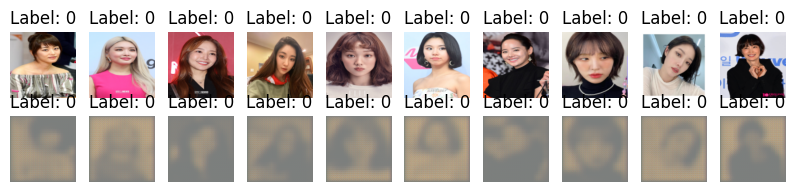

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 데이터셋 로드 (예시로 얼굴 이미지 데이터셋 사용)
transform = transforms.Compose([
    transforms.Resize((128, 128)),    # 이미지 크기 조절
    transforms.ToTensor()           # 이미지를 텐서로 변환
])

# 웜톤과 쿨톤 이미지를 각각 다른 폴더에 저장하고 데이터셋 경로를 지정해야 합니다.
# 라벨링된 데이터가 있다고 가정하고 각 데이터에 라벨을 부여합니다.
warmtone_dataset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/four_seasons/데이터셋_jpg/웜톤', transform=transform)
cooltone_dataset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/four_seasons/데이터셋_jpg/쿨톤', transform=transform)

# 라벨 정보를 추가하여 데이터셋을 합칩니다.
# 라벨링된 데이터가 있다면 이미지의 라벨을 적절하게 부여해야 합니다.
full_dataset = torch.utils.data.ConcatDataset([warmtone_dataset, cooltone_dataset])

# 데이터셋을 무작위로 섞습니다.
torch.manual_seed(42)  # 무작위로 섞기 위해 시드를 고정합니다.
data_loader = torch.utils.data.DataLoader(full_dataset, batch_size=64, shuffle=True)

# 합친 데이터셋을 무작위로 섞어서 학습용 데이터셋과 테스트용 데이터셋으로 분리합니다.
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# 각각의 데이터로더 생성
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 색상 오토인코더 모델 정의
class ColorAutoencoder(nn.Module):
    def __init__(self):
        super(ColorAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()    # 이미지는 0과 1 사이의 값으로 정규화되어 있으므로 Sigmoid 사용
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 모델과 손실 함수, 최적화 함수 정의
model = ColorAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
epochs = 10
for epoch in range(epochs):
    for data, _ in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 학습된 오토인코더로부터 변환된 이미지 생성 및 시각화
with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        break  # 첫 번째 배치의 이미지만 사용

    # 웜톤과 쿨톤 이미지 라벨
    warmtone_label = 0
    cooltone_label = 1

    # 원본 이미지
    original_images = data
    # 변형된 이미지
    transformed_images = outputs

    # 시각화
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(original_images[i].permute(1, 2, 0))
        axes[0, i].set_title(f"Label: {labels[i].item()}")
        axes[0, i].axis('off')
        axes[1, i].imshow(transformed_images[i].permute(1, 2, 0))
        axes[1, i].set_title(f"Label: {labels[i].item()}")
        axes[1, i].axis('off')
    plt.show()


# 2.  간단한 CNN 모델

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import cv2
import os
import glob
from PIL import Image

In [5]:
# 파일 불러오는 함수
def load_images_from_directory(directory_path):
    image_paths = glob.glob(directory_path + '/*.jpg')  # 디렉토리 내의 모든 jpg 파일 경로 찾기
    image_paths.extend(glob.glob(directory_path + '/*.jpeg'))  # 디렉토리 내의 모든 jpeg 파일 경로 추가

    images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        image_np = np.array(image)
        images.append(image_np)

    return images

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# 모든 이미지 불러오기
directory_path = "/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg"  # 디렉토리 경로
directory_path2 = "/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg"  # 디렉토리 경로
images = load_images_from_directory(directory_path)
images2 = load_images_from_directory(directory_path2)

length = len(images)
print(length)
print(len(images2))

# 이미지 리스트 합치기
images = np.concatenate((images, images2), axis=0)
print(len(images))

50
50
100


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [59]:
def preprocess_image(image):
    # 이미지 크기 조절
    image = tf.image.resize(image, (200, 200))
    # 이미지를 [0, 1] 범위로 정규화
    image = image / 255.0
    return image

images = np.array([preprocess_image(image) for image in images])

- KNN과 다르게 평탄화 작업을 제거하였고 리사이즈 함수가 다르다

In [60]:
# labels에 대한 코드
num = len(images)
labels = np.zeros(num)

# 처음 50개의 요소를 1로 변경
# 0이 쿨톤 1이 웜톤
labels[length:] = 1

# 0이 쿨톤 1이 웜톤
print(len(images))
print(labels.shape)
print(labels)

100
(100,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images,
                                                  labels,
                                                  test_size=0.3,
                                                  random_state=1024)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (70, 200, 200, 3)
y_train:  (70,)
x_val:  (30, 200, 200, 3)
y_val:  (30,)


In [83]:
# 데이터를 텐서로 변환
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)

In [84]:

# 모델 정의
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 두 개의 클래스로 분류 예시
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [85]:

# 모델 학습
num_epochs = 10
model.fit(x_train, y_train, epochs=num_epochs, batch_size=32)

print("Training finished!")

Epoch 1/10
3/3 [==============================] - 3s 656ms/step - loss: 5.5442 - accuracy: 0.4857
Epoch 2/10
3/3 [==============================] - 3s 858ms/step - loss: 2.8291 - accuracy: 0.4571
Epoch 3/10
3/3 [==============================] - 3s 965ms/step - loss: 0.8632 - accuracy: 0.4571
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 0.7398 - accuracy: 0.5429
Epoch 5/10
3/3 [==============================] - 3s 792ms/step - loss: 0.6778 - accuracy: 0.5571
Epoch 6/10
3/3 [==============================] - 3s 767ms/step - loss: 0.6365 - accuracy: 0.6571
Epoch 7/10
3/3 [==============================] - 3s 914ms/step - loss: 0.5928 - accuracy: 0.8571
Epoch 8/10
3/3 [==============================] - 4s 1s/step - loss: 0.5149 - accuracy: 0.8571
Epoch 9/10
3/3 [==============================] - 3s 770ms/step - loss: 0.4689 - accuracy: 0.9143
Epoch 10/10
3/3 [==============================] - 3s 875ms/step - loss: 0.4340 - accuracy: 0.7857
Training finished!


In [86]:
pred = model.predict(x_val)
pred_class = np.argmax(pred, axis=1)
y_val = np.array(y_val)

1/1 [==============================] - 1s 879ms/step


In [87]:
print(pred_class)
print(y_val)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0]


In [88]:
acc = np.mean(pred_class == y_val)
print('accuracy: %f' % (acc,))

accuracy: 0.400000


ramdom_state를 변화시키면서 train, val 나누는 코드부터 반복 시도함  
1차 시도: 0.56  
2차 시도: 0.53  
3차 시도: 0.33  
4차 시도: 0.40  
5차 시도: 0.40